In [1]:
#import nacessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/aloksingh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# loading datasets
data = pd.read_csv("50_Startups (1).csv")

# EDA

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
#checking how many columns and row data have
data.shape

(50, 4)

In [6]:
# imformation about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [7]:
#checking  null values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [8]:
# checking duplicate value
data.duplicated().sum()

0

In [9]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
#visualization 

<Axes: >

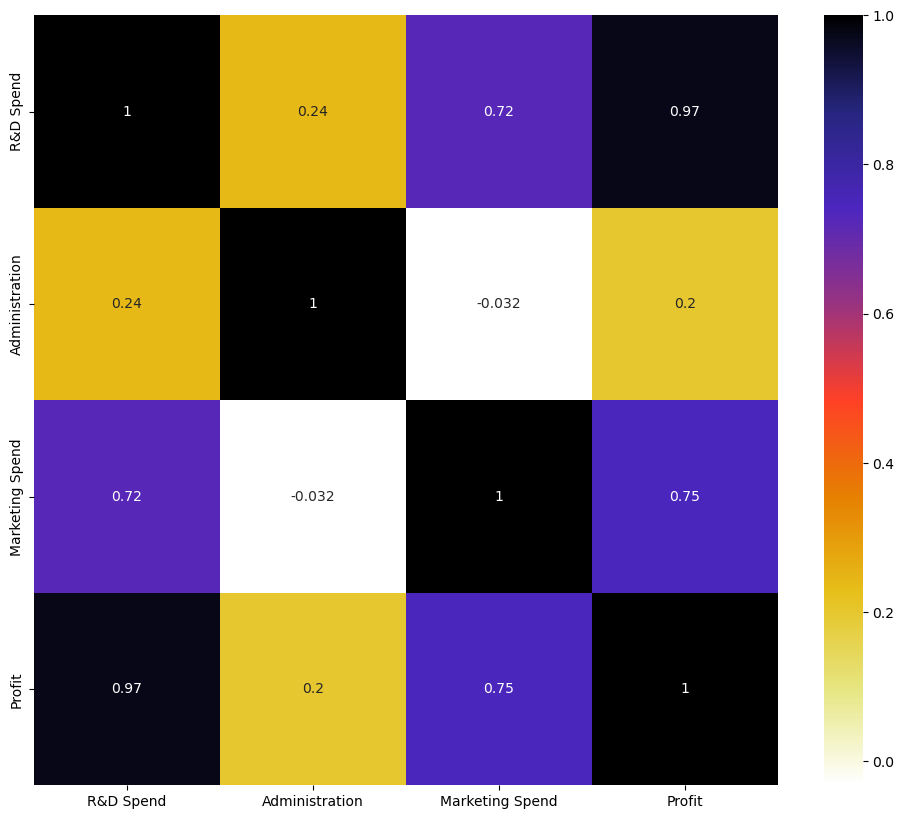

In [11]:
plt.figure(figsize = (12,10))
corr=data.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)

from above heatmap we can see that r&d spend and marketing spend are most correlated to the profit

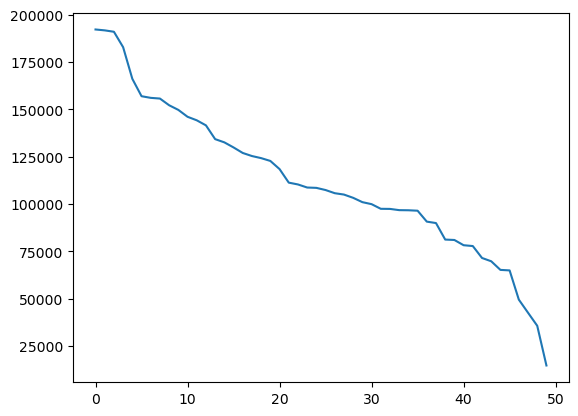

In [12]:
plt.plot(data["Profit"])

profit goes decrease  

In [13]:
data["Profit"].sort_values(ascending=False)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

<Axes: >

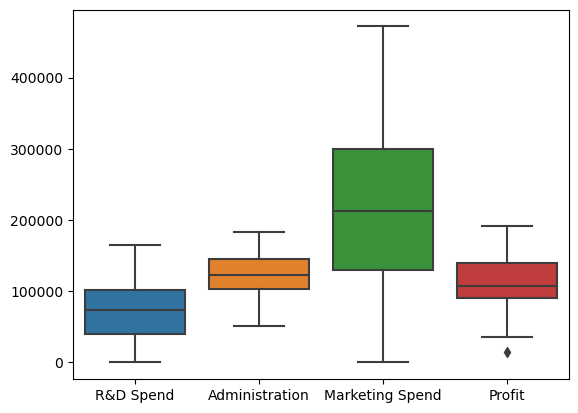

In [14]:
sns.boxplot(data)

# model building

In [15]:
x = data.drop("Profit",axis = 1)
y = data.Profit

In [16]:
#divide data into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((35, 3), (15, 3))

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dt = DecisionTreeRegressor(criterion="squared_error",max_depth=4,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [19]:
dt.score(x_train,y_train)

0.9868918161633682

In [20]:
dt.score(x_test,y_test)

0.8418708426695372

# multiple linear regression

In [21]:
# changing columns names
data.rename(columns ={"R&D Spend":"rd_spend",'Marketing Spend': "markenting_spend"}, inplace = True)

In [22]:
import statsmodels.formula.api as sm

In [23]:

model = sm.ols('Profit~rd_spend+Administration+markenting_spend',data= data).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        23:51:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd_spend             0.8057      0.045     17.846      0.000       0.715       0.897
Administration      -0.0268      0.051     -0.526      0.602      -0.130       0.076
markenting_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

as you can see p-value of administration is grater then 0.05 that means the column is not important

# train and test value's has more difference for that we can check which features is more important for that we use decisionTree

In [25]:
reg = DecisionTreeRegressor()
model = reg.fit(x,y)

In [26]:
score = model.feature_importances_
scors = pd.DataFrame(score)
scors.index = x.columns
scors

,0
R&D Spend,0.866802
Administration,0.007910
Marketing Spend,0.125288


from above we can see that administration has low value so we can drop that column

In [27]:
x_train.drop("Administration",axis=1,inplace = True)
x_test.drop("Administration",axis = 1,inplace = True)

# again use decision Tree

In [28]:
dt1 = DecisionTreeRegressor(criterion="squared_error",max_depth=4,random_state=42)
dt1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [29]:
dt1.score(x_train,y_train)

0.9868918161633682

In [30]:
dt1.score(x_test,y_test)

0.8626229025683171

In [31]:
#predicting 
new = dt1.predict(x_test)
new

#Finding out accuracy of the predicted and actual value
from sklearn.metrics import r2_score
r2_score(y_test,new)


0.8626229025683171

# linear regression

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)


LinearRegression()

In [33]:
lm.score(x_train,y_train)

0.9482660138683449

In [34]:
lm.score(x_test,y_test)

0.9527095741745953

In [35]:
#predicting 
new1 = lm.predict(x_test)
new1

#Finding out accuracy of the predicted and actual value
from sklearn.metrics import r2_score
r2_score(y_test,new1)


0.9527095741745953

# random forest regression

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [37]:
rfc = RandomForestRegressor(random_state=0,bootstrap=True)
params = {"n_estimators":[100,200,300,400],'criterion':['squared_error',"absolute_error", "friedman_mse", "poisson"],'max_depth':[4,5,6,7,8]}
gv = GridSearchCV(estimator=rfc,param_grid=params,cv=15,n_jobs=1)
model = gv.fit(x_train,y_train)

In [38]:
model.best_params_

{'criterion': 'absolute_error', 'max_depth': 6, 'n_estimators': 100}

In [39]:
model.best_score_

0.8924024554322916

In [40]:
rfc1 = RandomForestRegressor(criterion='absolute_error',max_depth=6,n_estimators=100,random_state=0)
rfc1.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=6, random_state=0)

In [41]:
rfc1.score(x_train,y_train)

0.9925515438163418

In [42]:
rfc1.score(x_test,y_test)

0.9432408047618577

In [43]:
new2 = rfc1.predict(x_test)
r2_score(y_test,new1)

0.9527095741745953

# as per the accurecy and r2 score we can go for linear regression